In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
plt.rcParams['figure.figsize'] = [7.48, 8]
plt.rcParams['figure.dpi'] = 500
plt.rcParams['figure.facecolor'] = "white"
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

YELLOW = "#D4A418"
BLUE1 = "#152B52"
BLUE2 = "#485884"
BLUE3 = "#727f97"
BLACK = "#111111"

FONTSIZE = 6

![https://ourworldindata.org/uploads/2021/03/Share-of-internet-users.png](https://ourworldindata.org/uploads/2021/03/Share-of-internet-users.png)

In [3]:
df = pd.read_csv("share-of-individuals-using-the-internet.csv")

regions = list(set([c for c in df['Entity'] if 'WB' in c]))
countries = [
    c for c in df['Entity'] 
    if (
        'countries' not in c 
        and c not in regions
        and c not in ["World", "European Union (27)"]
    )
]

df['Entity'] = df['Entity'].apply(lambda x: x.replace(" (WB)",""))
regions = [x.replace(" (WB)","") for x in regions]

max_year = 2020
df = df[df['Year'] <= max_year]
val_col = 'Individuals using the Internet (% of population)'
df = df[['Entity', 'Year', val_col]].dropna()

df.head()

Entity  Year  Individuals using the Internet (% of population)
0  Afghanistan  1990                                               0.0
1  Afghanistan  1991                                               0.0
2  Afghanistan  1992                                               0.0
3  Afghanistan  1993                                               0.0
4  Afghanistan  1994                                               0.0

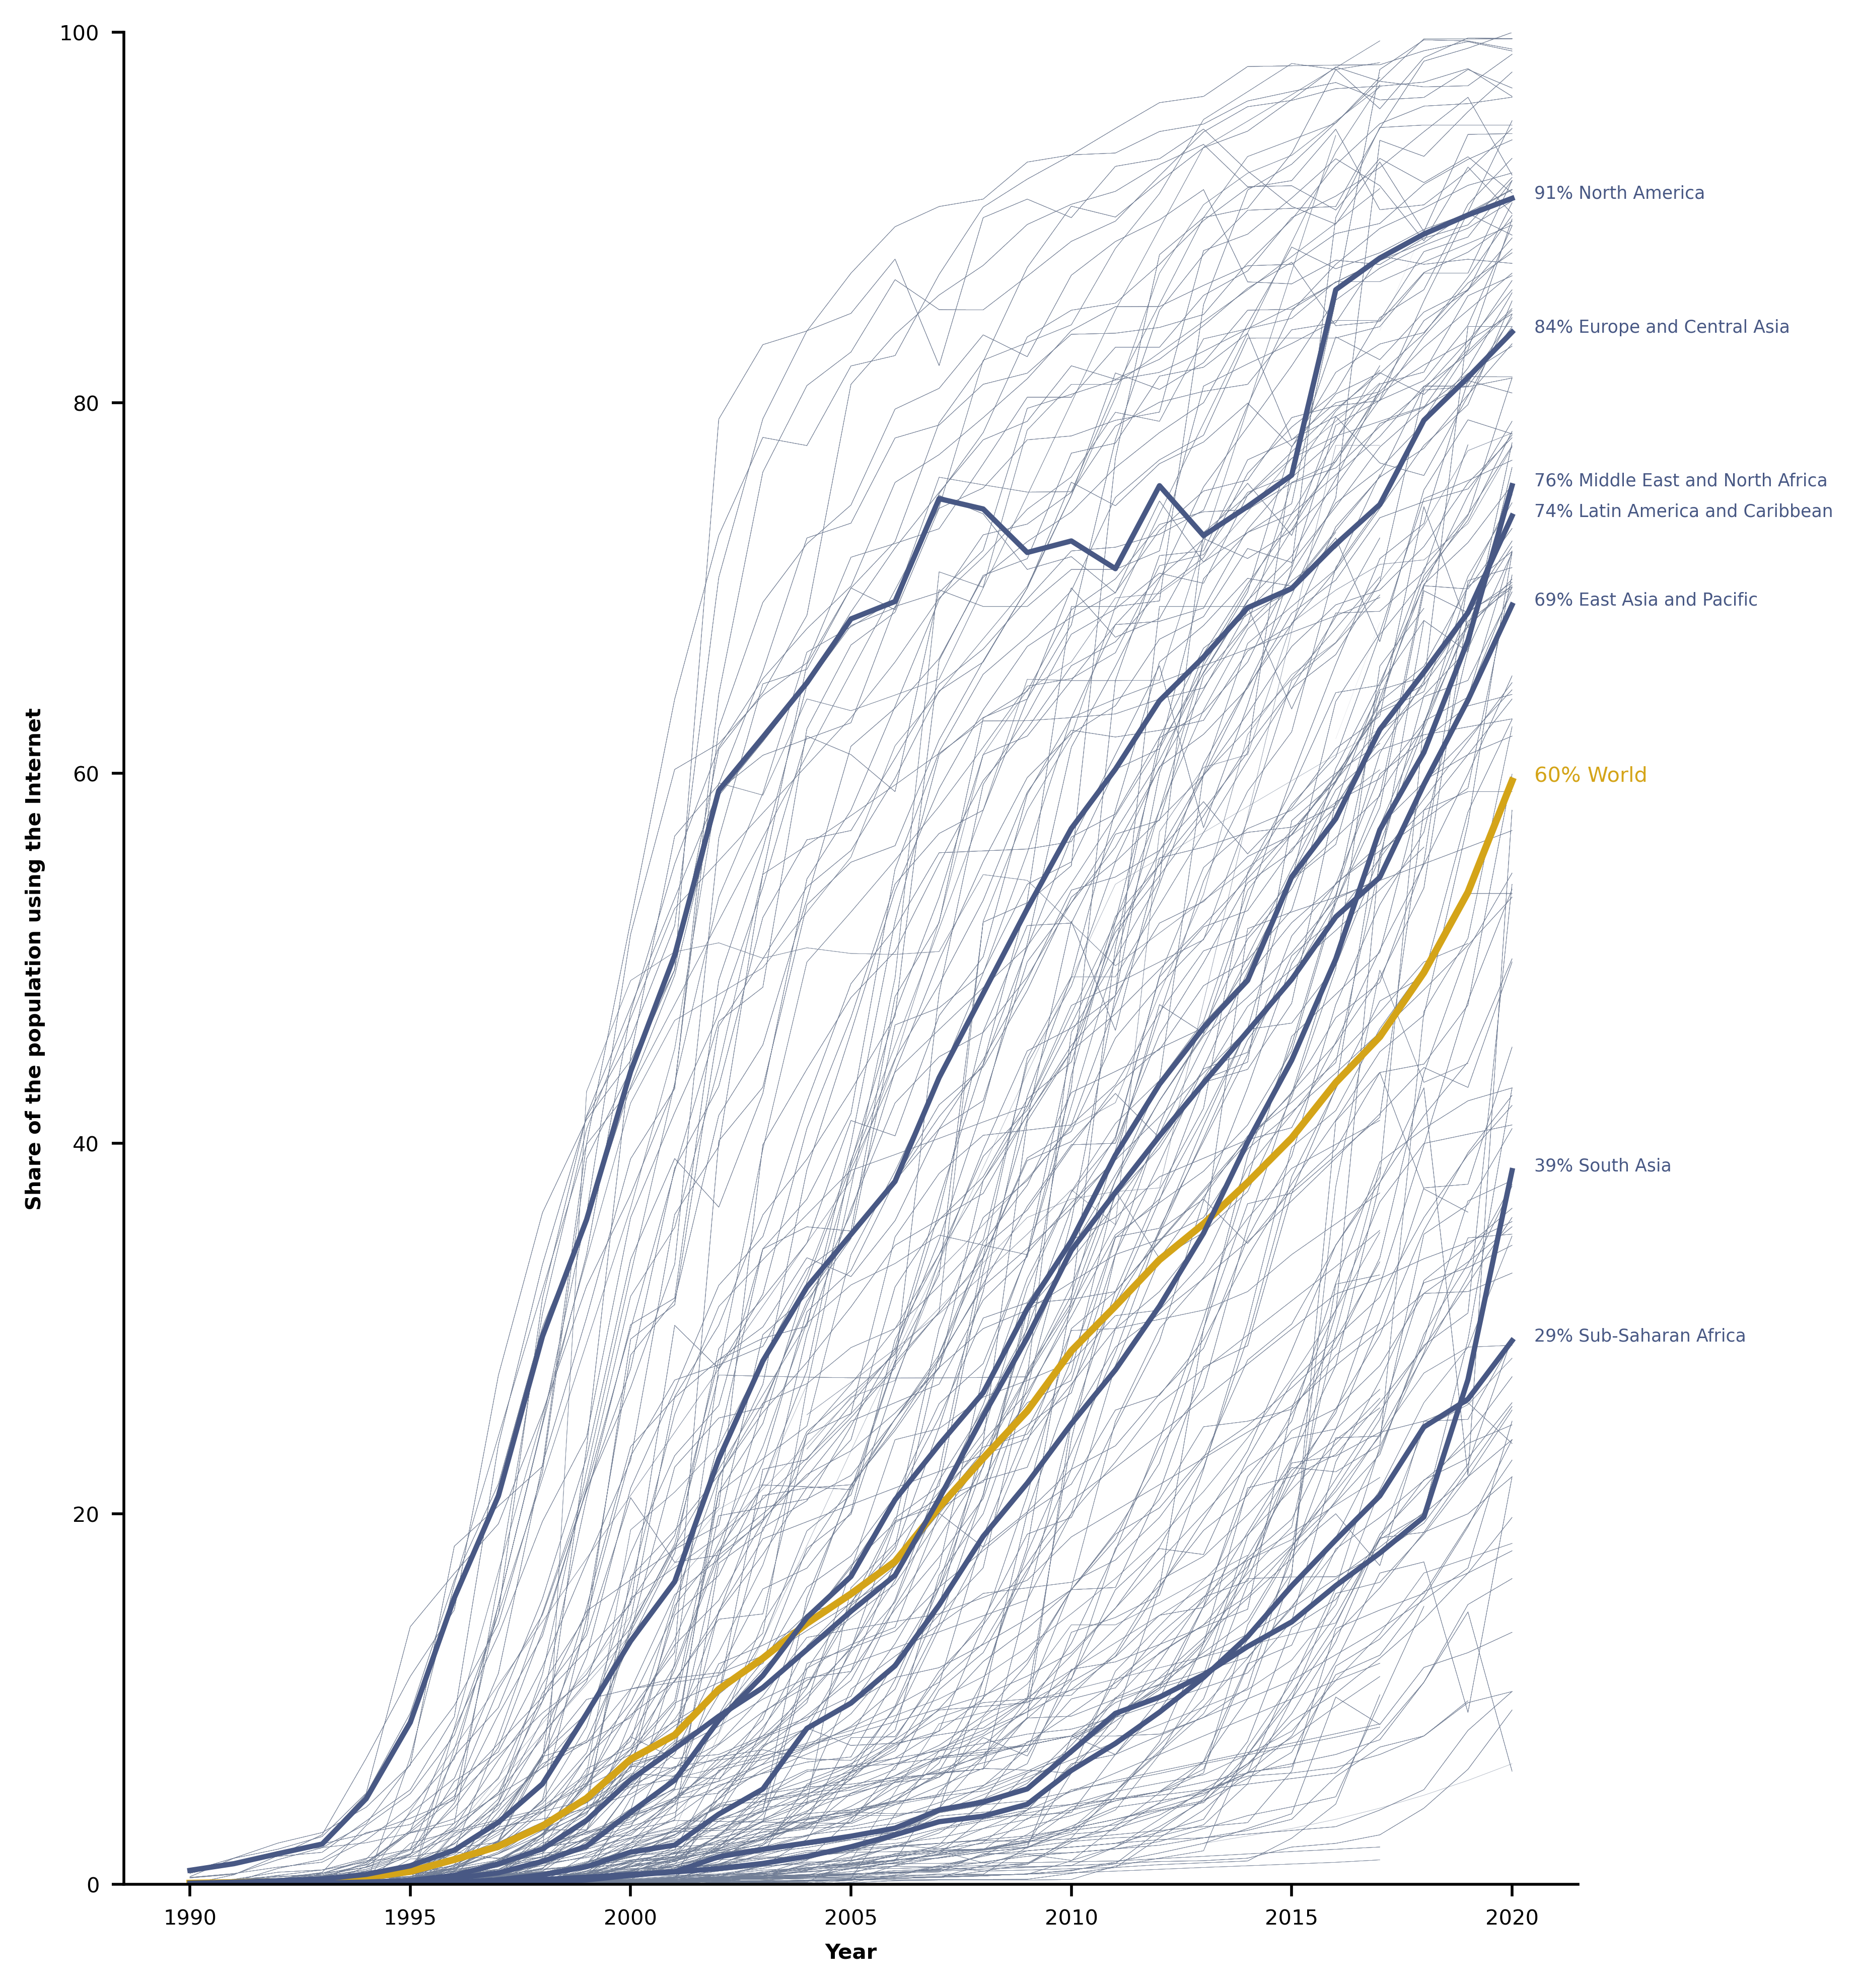

In [5]:
fig, ax = plt.subplots()

for country in countries:
    dff = df[df['Entity']==country]
    xs = dff['Year'].to_list()
    ys = dff[val_col].to_list()
    ax.plot(xs, ys, color=BLUE3, lw=.1, alpha=.1)

dff = df[df['Entity']=='World']
xs = dff['Year'].to_list()
ys = dff[val_col].to_list()
ax.plot(xs, ys, color=YELLOW, lw=2)
label = f"{round(ys[-1])}% World"
ax.annotate(label, xy=(max_year + .5, ys[-1]), size=FONTSIZE, color=YELLOW)
    
for region in regions:
    dff = df[df['Entity']==region]
    xs = dff['Year'].to_list()
    ys = dff[val_col].to_list()
    ax.plot(xs, ys, label=region, color=BLUE2, lw=1.5)
    label = f"{round(ys[-1])}% {region}"
    ax.annotate(label, xy=(max_year + .5, ys[-1]), size=FONTSIZE-1, color=BLUE2)    
    
ax.set_xlabel('Year', fontsize=FONTSIZE, weight='bold')
ax.set_ylabel('Share of the population using the Internet', fontsize=FONTSIZE, weight='bold')
ax.tick_params('both', labelsize=FONTSIZE)
ax.set_ylim(0,100)

plt.tight_layout()
plt.savefig("share_online.png")